In [18]:
#!/bin/bash
import os
import pickle
import PIL.Image
import numpy as np
import dnnlib
import dnnlib.tflib as tflib
import config
import gif
from encoder.generator_model import Generator

import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
URL_FFHQ = 'https://drive.google.com/uc?id=1MEGjdvVpUsu1jB4zrXZN7Y4kBBOzizDQ'

tflib.init_tf()
with dnnlib.util.open_url(URL_FFHQ, cache_dir=config.cache_dir) as f:
    generator_network, discriminator_network, Gs_network = pickle.load(f)

generator = Generator(Gs_network, batch_size=1, randomize_noise=False)

ValueError: Variable learnable_dlatents already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:

  File "/home/bobby/APhotoADay/maindev/stylegan-encoder/encoder/generator_model.py", line 15, in create_variable_for_generator
    initializer=tf.initializers.random_normal())
  File "/home/bobby/APhotoADay/maindev/stylegan-encoder/dnnlib/tflib/network.py", line 406, in <listcomp>
    in_expr = [input_builder(name) for input_builder, name in zip(custom_inputs, self.input_names)]
  File "/home/bobby/APhotoADay/maindev/stylegan-encoder/dnnlib/tflib/network.py", line 406, in run
    in_expr = [input_builder(name) for input_builder, name in zip(custom_inputs, self.input_names)]
  File "/home/bobby/APhotoADay/maindev/stylegan-encoder/encoder/generator_model.py", line 27, in __init__
    structure='fixed')
  File "<ipython-input-2-5b8e6e491508>", line 7, in <module>
    generator = Generator(Gs_network, batch_size=1, randomize_noise=False)


In [47]:
def generate_image(latent_vector):
    latent_vector = latent_vector.reshape((1, 18, 512))
    generator.set_dlatents(latent_vector)
    img_array = generator.generate_images()[0]
    img = PIL.Image.fromarray(img_array, 'RGB')
    return img.resize((256, 256))

def move_and_show(latent_vector, direction, coeffs):
    fig,ax = plt.subplots(1, len(coeffs), figsize=(15, 10), dpi=80)
    for i, coeff in enumerate(coeffs):
        new_latent_vector = latent_vector.copy()
        new_latent_vector[:8] = (latent_vector + coeff*direction)[:8]
        ax[i].imshow(generate_image(new_latent_vector))
        ax[i].set_title('Coeff: %0.1f' % coeff)
    [x.axis('off') for x in ax]
    plt.show()
    
def show_images (latent_vectors):
    fig,ax = plt.subplots(1, len(latent_vectors), figsize=(15, 10), dpi=80)
    for i, vector in enumerate(latent_vectors):
        ax[i].imshow(generate_image(vector))
        ax[i].set_title(i)
    [x.axis('off') for x in ax]
    plt.show()
    
def show_regular_images (images):
    fig,ax = plt.subplots(1, len(images), figsize=(15, 10), dpi=80)
    for i, image in enumerate(images):
        img = (PIL.Image.open(image))
        ax[i].imshow(img.resize((256,256)))
        ax[i].set_title(i)
    [x.axis('off') for x in ax]
    plt.show()
        
def generate_gif(name, start_vector, end_vector, grain, time):
    images = []
    direction = end_vector - start_vector
    for i in range(grain):
        images.append(generate_image(start_vector + direction * i / grain))
    gif.gifFromFrames(images, time, name)
    return name
    
def show_gif (gif):
    ![SegmentLocal](256px-Seven_segment_display-gif gif)

In [15]:
# Loading already learned representations
donald_trump = np.load('ffhq_dataset/latent_representations/donald_trump_01.npy')
hillary_clinton = np.load('ffhq_dataset/latent_representations/hillary_clinton_01.npy')

# Of course you can learn your own vectors using two scripts

# 1) Extract and align faces from images
# python align_images.py raw_images/ aligned_images/

# 2) Find latent representation of aligned images
# python encode_images.py aligned_images/ generated_images/ latent_representations/

In [26]:
# Loading already learned latent directions
age_direction = np.load('ffhq_dataset/latent_directions/age.npy')

# Loading already learned latent representations
young = np.load('latent_representations/frame3700_01.npy')
old = np.load('latent_representations/frame7780_01.npy')

# In general it's possible to find directions of almost any face attributes: position, hair style or color ... 
# Additional scripts for doing so will be realised soon

TypeError: 'AxesSubplot' object is not subscriptable

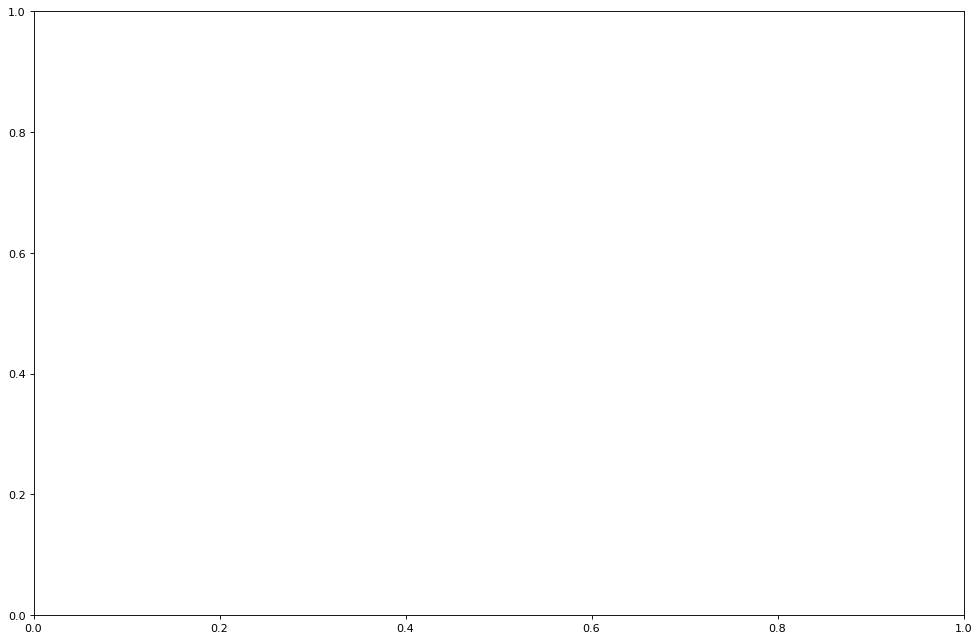

In [48]:
show_regular_images(['aligned_images/frame3700_01.png'])
move_and_show(young, age_direction, [0, -0.4, -0.8, -1.2, -1.6, -2.0])
actual_direction = old - young
move_and_show(young, actual_direction, [0, 0.2, 0.4, 0.6, 0.8, 1])
show_gif (generate_gif('real', young, old, 100, 5))
